In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.shape

(2200, 8)

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
print("Total Number Of Crops :",len(df["label"].unique()))
print("List of Crops :",df["label"].unique())

Total Number Of Crops : 22
List of Crops : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

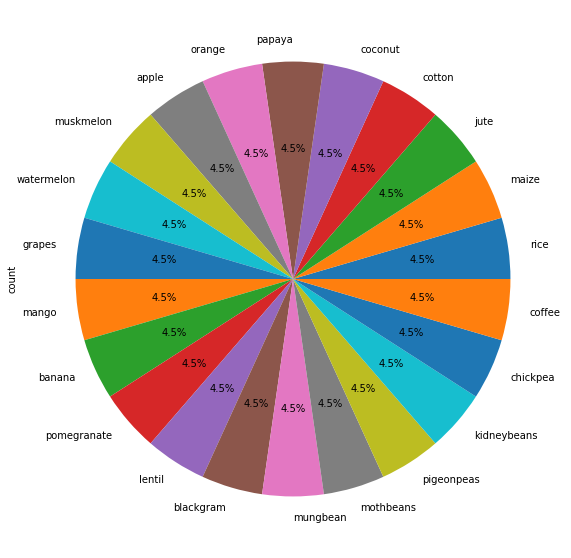

In [11]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

In [12]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


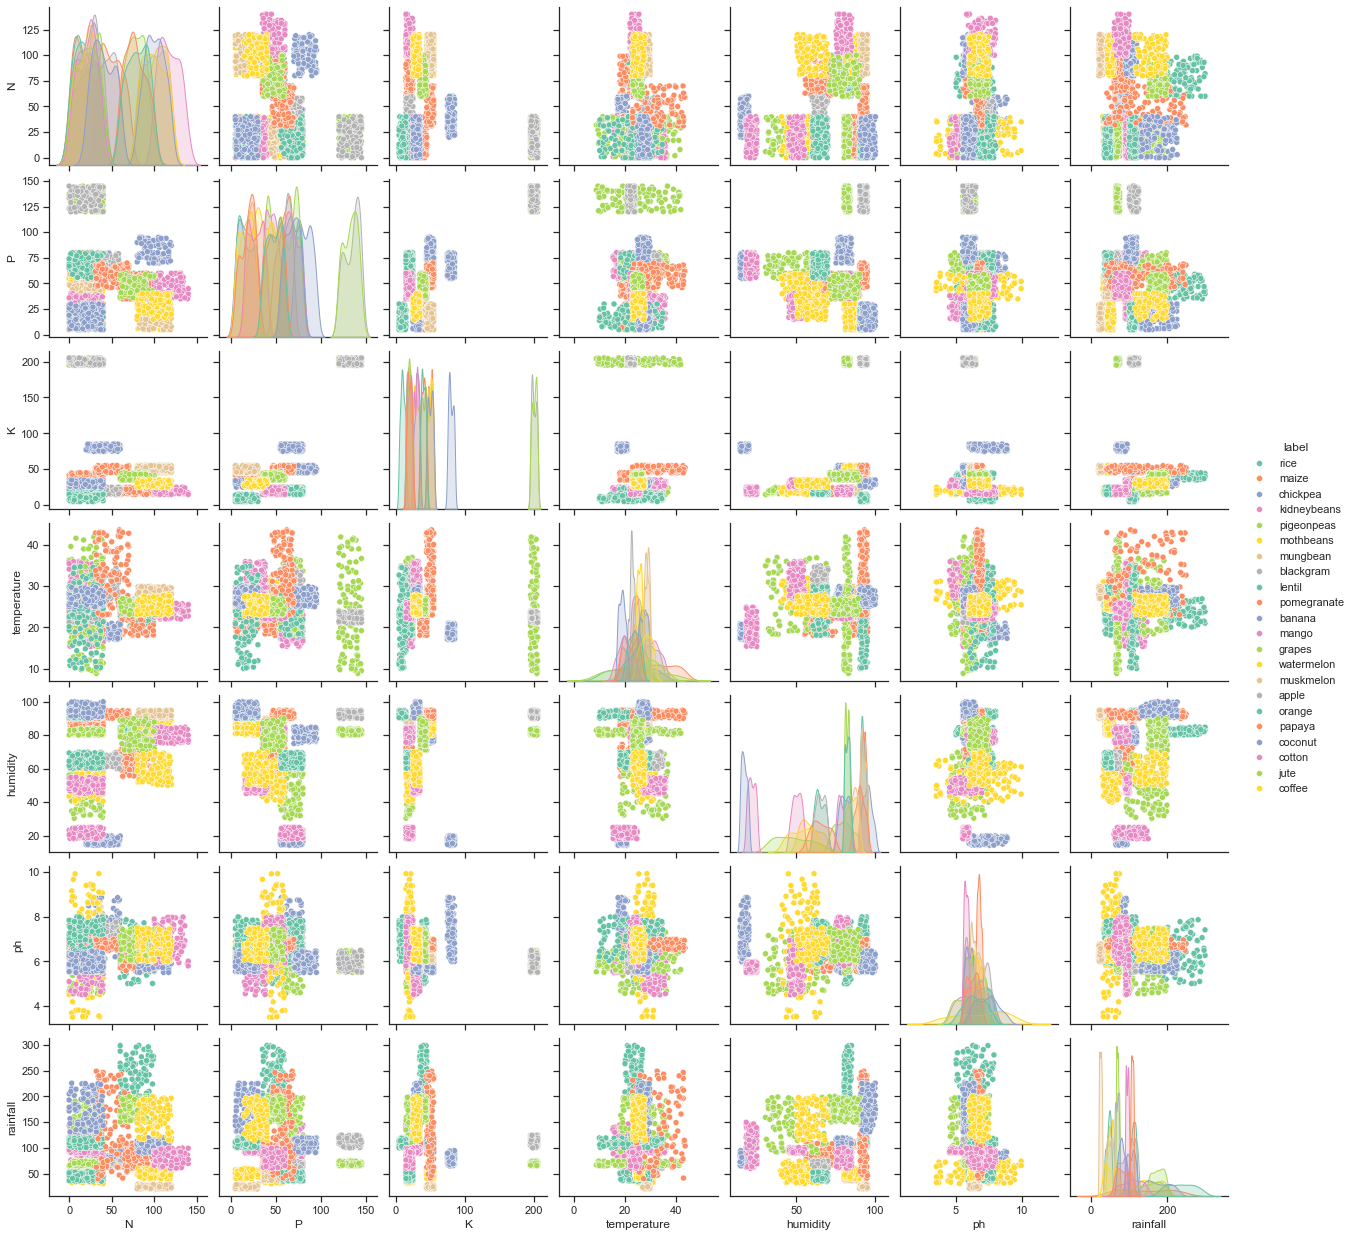

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the pairplot
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue="label", palette="Set2")
plt.show()

In [14]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [15]:
def check_dup(df):
    count_dup = df.duplicated().sum()
    print("Duplicates :",count_dup)
    if count_dup>=1:
        df.drop_duplicates(inplace=True)
        print("Found And Removed")
    else:
        print("Not Found")
print(check_dup(df))

Duplicates : 0
Not Found
None


In [16]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']   

In [17]:
from sklearn.model_selection import train_test_split 
X_train ,X_test , y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=32)

In [18]:
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650,)
y_test : (550,)


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
KNN_PREDICT = knn.predict(X_test)
predicted_values = knn.predict([[99,15,27,27.417112,56.636362,6.086922,127.924610]])
predicted_values

c:\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['coffee'], dtype=object)

98.18181818181819


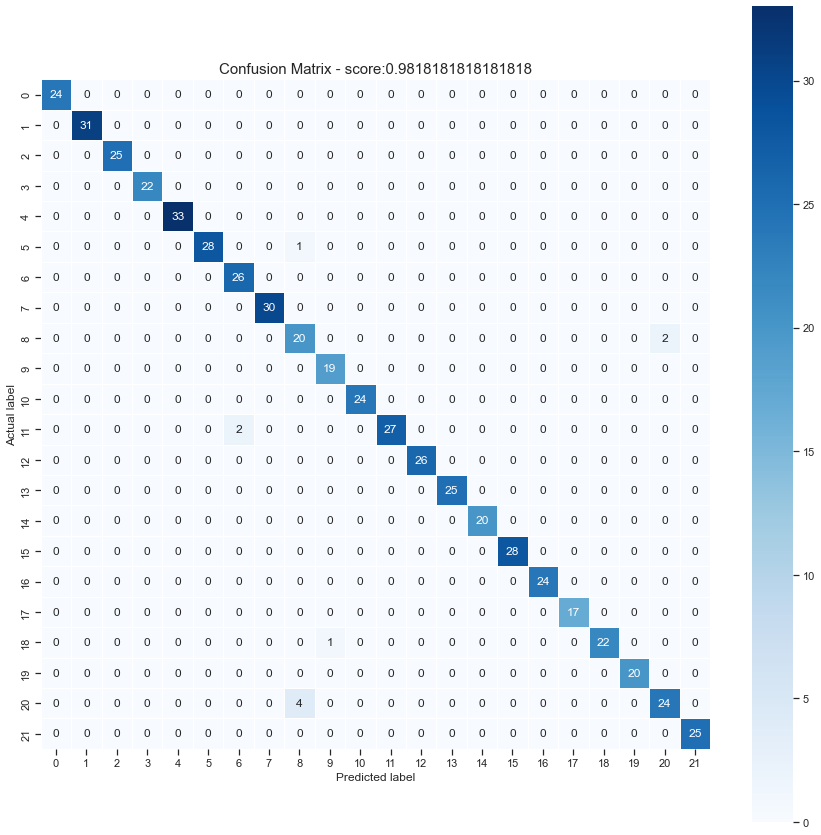

In [20]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc1 = accuracy_score(y_test,KNN_PREDICT)
print(acc1 * 100)
cnf_mat1 = confusion_matrix(y_test,KNN_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,KNN_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()
# print(cnf_mat1)

# DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
DEC_TREE_PREDICT = dec_tree.predict(X_test)

97.63636363636363


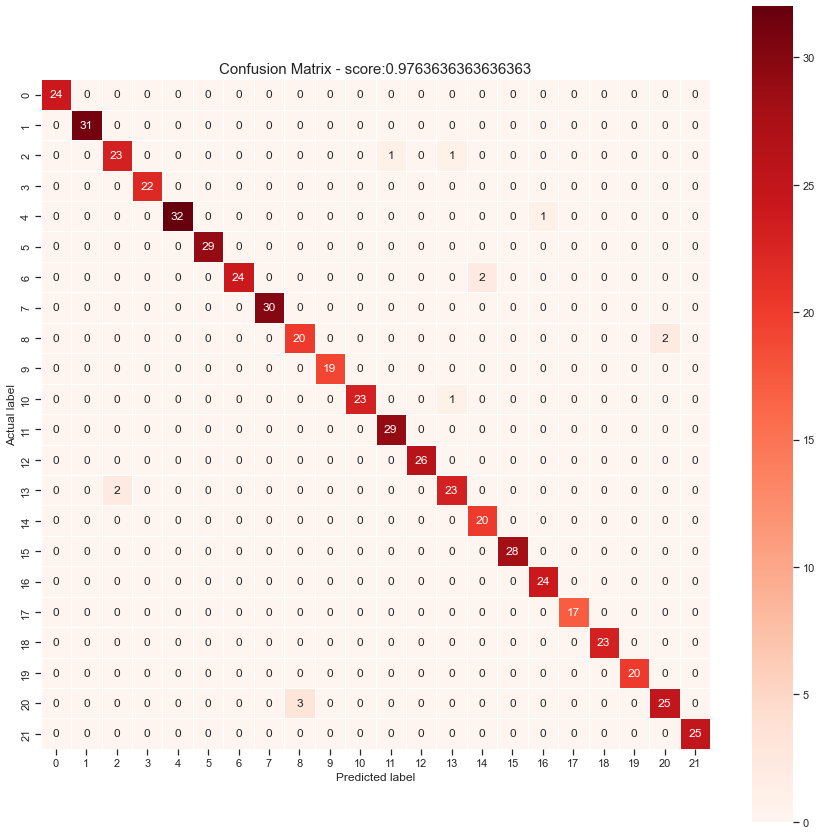

In [22]:
acc2 = accuracy_score(y_test,DEC_TREE_PREDICT)
print(acc2 * 100)
cnf_mat2 = confusion_matrix(y_test,DEC_TREE_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,DEC_TREE_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()

# print(cnf_mat2)

# RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators=10,random_state=0)
rand_for.fit(X_train,y_train)
RANDOM_PREDICT = rand_for.predict(X_test)
#predicted_values2 = rand_for.predict([[11,15,37,37.4, 56.636362,6.06922,143.924610]])
#predicted_values2


In [24]:
acc3 = accuracy_score(y_test,RANDOM_PREDICT)
print(acc3 * 100)

98.9090909090909


# GAUSSIAN NB


In [25]:
from sklearn.naive_bayes import GaussianNB
nb_class = GaussianNB()
nb_class.fit(X_train,y_train)
NB_PREDICT  = nb_class.predict(X_test)
#NB_PREDICT  = nb_class.predict([[76,48,18,19.29563411,69.63481219,5.77597783,83.21030571]])
#NB_PREDICT

In [26]:
acc4 = accuracy_score(y_test,NB_PREDICT)
print(acc4 * 100)

99.27272727272727


# GRADIENT BOOSTING


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gd_class = GradientBoostingClassifier()
gd_class.fit(X_train,y_train)
GD_PREDICT = gd_class.predict(X_test)

In [28]:
acc5 = accuracy_score(y_test,GD_PREDICT)
acc5

0.9836363636363636

98.36363636363636


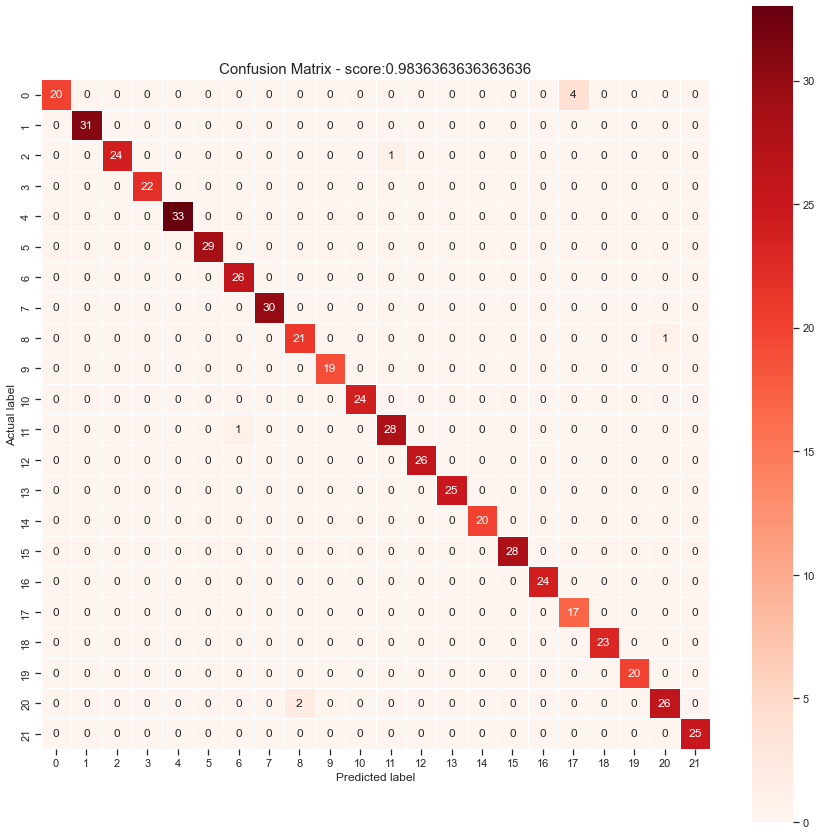

In [29]:
acc5 = accuracy_score(y_test,GD_PREDICT)
print(acc5 * 100)
cnf_mat2 = confusion_matrix(y_test,GD_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,GD_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()

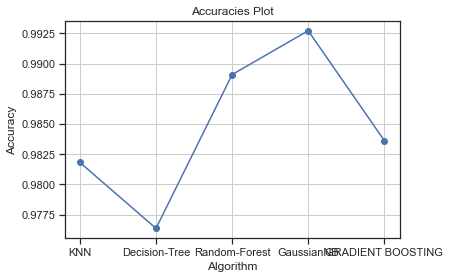

In [30]:

accuracies = [acc1,acc2,acc3,acc4,acc5]
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracies Plot')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracies)), ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT BOOSTING'])
plt.grid(True)
plt.show()

In [31]:
import plotly.graph_objects as go
# Assuming you have a list of accuracies
accuracies = [acc1, acc2, acc3,acc4,acc5]
algorithms = ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT-BOOSTING']
# Creating the plot
fig = go.Figure(data=go.Scatter(x=algorithms, y=accuracies, mode='markers+lines', marker=dict(symbol='circle', size=10), line=dict(width=2)))
# Adding titles and labels
fig.update_layout(title='Accuracies Plot', xaxis_title='Algorithm', yaxis_title='Accuracy')
fig.show()

In [32]:
# import pickle

# # Save the model to disk
# with open('crop_recommendation_model.pkl', 'wb') as file:
#     pickle.dump(knn, file)

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# import pickle

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# with open('model2.pkl', 'wb') as f:   
#     pickle.dump(model, f)


In [34]:
import pickle
with open("crop_recommendation_model3.pkl", "wb") as f:
    pickle.dump(gd_class, f)

print("Model saved as crop_recommendation_model3.pkl")


Model saved as crop_recommendation_model3.pkl
